In [1]:
import pandas as pd
import missingno as msno
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

path = './data/'
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.max_columns = 350
pd.options.display.max_rows = 999

In [2]:
sigungu = pd.read_csv(path+'sigungu_wide.csv', encoding='cp949')
sigungu_15 = pd.read_csv(path+'imp_시군구별지역안전지표_2015.csv', encoding='cp949')

In [3]:
sigungu_14 = sigungu.loc[sigungu['년도']==2014]

In [4]:
#2015년과 같은 열만 뽑아내기
col = sigungu_15.columns

#2015년과 같도록 2014 데이터 프레임 잘라내기
sigungu_14 = sigungu_14.loc[:,col]

#제주시, 서귀포시, 연기군, 청원군행 삭제
sigungu_14.set_index(sigungu_14['지역'], inplace=True)
sigungu_14.drop(['2014_충청남도_연기군','2014_충청북도_청원군','2014_제주특별자치도_서귀포시','2014_제주특별자치도_제주시'],axis=0, inplace=True)

sigungu.set_index(sigungu['지역'], inplace=True)
sigungu.drop(['2013_충청남도_연기군','2015_충청남도_연기군',
               '2013_충청북도_청원군','2015_충청북도_청원군',
               '2013_제주특별자치도_서귀포시','2015_제주특별자치도_서귀포시',
               '2013_제주특별자치도_제주시','2015_제주특별자치도_제주시'],axis=0, inplace=True)


C:\Users\COM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [5]:
sigungu_14.reset_index(drop=True,inplace=True)

In [6]:
def info_df(data):
    info_df = pd.DataFrame({"type":data.dtypes,
                            'null_count':data.isnull().sum(),
                           'rate':data.isnull().sum()/data.isnull().count() * 100}).T
    return info_df

### 평균치 채워주는 함수

### 평균치 채워주는 함수(시군구용)

In [7]:
def mean_score(columns,*r):
    
    a = 0
    b = len(r)
    for reg in r:
        a += (sigungu_14.loc[sigungu_14["지역"]==reg,columns].values)
    
    c= a/b
    
    return c

### 결측치 채워주는 함수

In [8]:
def fill_score(columns,score,*r):
    
    
    for reg in r:
        sigungu_14.loc[sigungu_14["지역"]==reg,columns] = sigungu_14.loc[sigungu_14["지역"]==reg,columns].fillna(score)

## 전체데이터 채워주는 함수

In [9]:
def fill_all(*r):
    
    for reg in r:
        sigungu_14.loc[:,r] = sigungu_15.loc[:,r]

## 2014년 데이터 결측치 확인

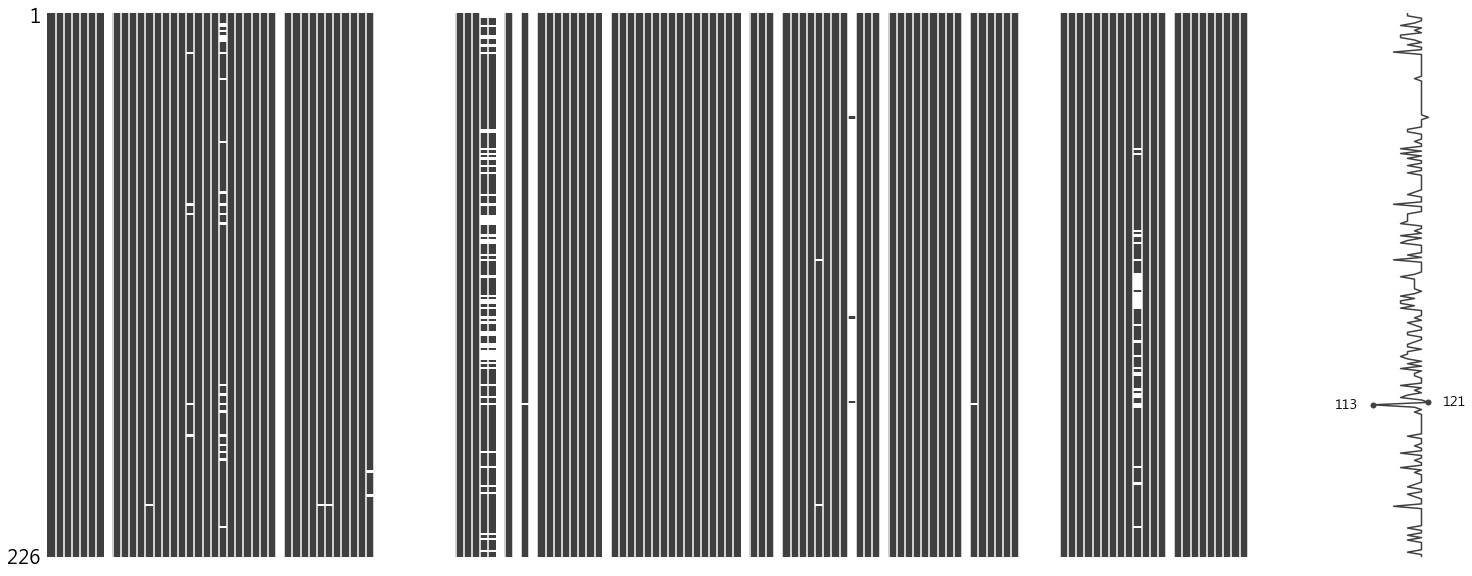

In [10]:
msno.matrix(sigungu_14)

# 전체데이터 빈것 채우기

## 범죄류

In [11]:
fill_all('범죄발생건수(강간.강제추행)','범죄발생건수(강도)','범죄발생건수(도박)',
        '범죄발생건수(마약)','범죄발생건수(방화)','범죄발생건수(살인)',
        '범죄발생건수(약취.유인)','범죄발생건수(절도)','범죄발생건수(폭력)')

In [12]:
sigungu_14.loc[:,['범죄발생건수(강간.강제추행)','범죄발생건수(강도)','범죄발생건수(도박)',
        '범죄발생건수(마약)','범죄발생건수(방화)','범죄발생건수(살인)',
        '범죄발생건수(약취.유인)','범죄발생건수(절도)','범죄발생건수(폭력)']]

,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력)
0,4.63377,0.50971,1.29746,0.55605,0.50971,0.13901,0.00000,48.65458,68.02374
1,2.64297,0.33037,1.98223,0.33037,0.33037,0.66074,0.00000,23.12597,63.10086
2,4.97028,0.42300,1.37476,0.21150,0.52875,0.00000,0.10575,34.47474,76.24627
3,1.93600,0.13829,0.82971,0.00000,0.13829,0.00000,0.00000,41.90060,62.92004
4,3.88199,0.24262,1.09181,0.36394,0.48525,0.12131,0.12131,35.05920,74.60695
5,1.25586,0.41862,0.83724,0.41862,0.00000,0.41862,0.00000,21.76825,26.79169
6,4.36031,0.00000,1.45344,0.36336,0.00000,0.00000,0.00000,36.33589,63.95116
7,2.73693,0.74644,0.99525,0.24881,0.49762,0.24881,0.24881,19.40733,43.29327
8,4.58306,0.36665,0.88606,0.82495,0.36665,0.18332,0.06111,54.93565,79.28700
9,2.77136,0.00000,3.69515,2.15550,0.00000,0.00000,0.00000,20.93918,29.25327


## 의료보장 공.교 가입자수

In [13]:
sido_2013_m = sigungu[sigungu['년도'].isin(['2013'])]
sido_2013_m = sido_2013_m['의료보장 공.교 가입자수'].values

In [14]:
sido_2015_m = sigungu[sigungu['년도'].isin(['2015'])]
sido_2015_m = sido_2015_m['의료보장 공.교 가입자수'].values

In [15]:
mean = (sido_2013_m+sido_2015_m)/2
mean

array([ 465.868595,  935.68144 ,  577.57011 ,  416.90811 ,  521.058865,
       1432.924105,  496.700865,  450.055615,  435.274735, 1213.59977 ,
        356.02083 ,  973.754995,  625.48603 ,  388.312885,  311.391815,
        508.996105, 1794.769795,  329.333485,  449.3029  ,  299.692435,
        557.97268 ,  220.073185,  190.190595,  253.476635,  293.87714 ,
        245.686655,  230.612225,  295.37131 ,  239.29547 ,  274.173905,
        312.349305,  140.28587 ,  145.851215,  224.46064 ,  306.116365,
        334.688565,  362.399445,  288.38048 ,  781.60915 ,  172.177235,
        260.826765,  307.183685,  265.39103 ,  245.55321 ,  292.370325,
        275.50815 ,  396.792975,  226.08227 ,  232.736745,  182.15898 ,
        345.13655 ,  255.12493 ,  241.98166 ,  290.365355,  287.38237 ,
        310.61629 ,  330.32023 ,  202.58208 ,  371.247555,  444.502335,
        254.495835,  373.487555,  255.35748 ,  304.3601  ,  232.744235,
        330.14702 ,  341.191845,  306.52777 ,  291.74509 ,  289.

In [16]:
sigungu_14['의료보장 공.교 가입자수'] = mean

In [17]:
sigungu_14.loc[:,['지역','의료보장 공.교 가입자수']]

,지역,의료보장 공.교 가입자수
0,2014_강원도_강릉시,465.868595
1,2014_강원도_고성군,935.681440
2,2014_강원도_동해시,577.570110
3,2014_강원도_삼척시,416.908110
4,2014_강원도_속초시,521.058865
5,2014_강원도_양구군,1432.924105
6,2014_강원도_양양군,496.700865
7,2014_강원도_영월군,450.055615
8,2014_강원도_원주시,435.274735
9,2014_강원도_인제군,1213.599770


## 의료인력

In [18]:
fill_all('의료인력')

In [19]:
sigungu_14.loc[:,['지역','의료인력']]

,지역,의료인력
0,2014_강원도_강릉시,0.41704
1,2014_강원도_고성군,0.00000
2,2014_강원도_동해시,0.31725
3,2014_강원도_삼척시,0.27657
4,2014_강원도_속초시,0.36394
5,2014_강원도_양구군,1.25586
6,2014_강원도_양양군,0.00000
7,2014_강원도_영월군,0.49762
8,2014_강원도_원주시,0.54997
9,2014_강원도_인제군,0.61586


## 지역안전도류

In [20]:
fill_all('지역안전도(관리능력)','지역안전도(등급)','지역안전도(방재성능)',
        '지역안전도(위험환경)','지역안전도(점수)')

In [21]:
sigungu_14.loc[:,['지역안전도(관리능력)','지역안전도(등급)','지역안전도(방재성능)',
        '지역안전도(위험환경)','지역안전도(점수)']]

,지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수)
0,0.741,4.0,0.438,0.553,59.98
1,0.752,2.0,0.746,0.524,71.80
2,0.825,3.0,0.529,0.480,68.08
3,0.854,2.0,0.867,0.585,72.76
4,0.910,1.0,0.822,0.472,79.06
5,0.912,4.0,0.270,0.529,55.42
6,0.894,4.0,0.300,0.527,56.80
7,0.965,4.0,0.240,0.507,54.94
8,0.850,2.0,0.960,0.505,78.16
9,0.785,2.0,0.744,0.570,70.12


### '감염병 발생건수'

In [22]:
fill_all('감염병 발생건수')

### 급경사지 붕괴위험지구 수

In [23]:
fill_all('급경사지 붕괴위험지구 수')

### 비닐하우스 면적

In [24]:
fill_all('비닐하우스 면적')

### 산사태위험지역 면적

In [25]:
fill_all('산사태위험지역 면적')

### 수계밀도

In [26]:
fill_all('수계밀도')

### 야간인구수

In [27]:
fill_all('야간인구수')

### 반지하가구 수

In [28]:
fill_all('반지하가구 수')

### 자연재해 사망자수

In [29]:
fill_all('자연재해 사망자수')

### 주간인구지수

In [30]:
fill_all('주간인구지수')

### 해안선 길이

In [31]:
fill_all('해안선 길이')

### 자연재해위험개선지구 수

In [32]:
fill_all('자연재해위험개선지구 수')

# 개별 결측치 채우기

### 건축용지 면적
#### 충남 당진시 12년(0.05232) 15(0.06366)년 1:2의 가중치로 평균

In [33]:
(0.05232 + 0.06366*2)/3

0.059879999999999996

In [34]:
### 값 대체하기 ###
fill_score('건축용지 면적',0.059879999999999996,'2014_충청남도_당진시')

In [35]:
sigungu_14.loc[sigungu_14['건축용지 면적'].isnull(),['년도','시도','지역','건축용지 면적']].shape

(0, 4)

### 교통문화지수

#### 시군구 데이터 2014년 평균값 집어넣음

In [36]:
a = sigungu.groupby(['년도','시도']).mean()
a['교통문화지수']

년도    시도     
2008  강원도              NaN
      경기도              NaN
      경상남도             NaN
      경상북도             NaN
      광주광역시            NaN
      대구광역시            NaN
      대전광역시            NaN
      부산광역시            NaN
      서울특별시            NaN
      울산광역시            NaN
      인천광역시            NaN
      전라남도             NaN
      전라북도             NaN
      제주특별자치도          NaN
      충청남도             NaN
      충청북도             NaN
2009  강원도        67.947222
      경기도        74.582903
      경상남도       68.286667
      경상북도       65.799130
      광주광역시      77.954000
      대구광역시      80.848750
      대전광역시      80.690000
      부산광역시      78.779375
      서울특별시      80.215600
      울산광역시      82.214000
      인천광역시      70.594000
      전라남도       63.663636
      전라북도       72.067857
      제주특별자치도    68.570000
      충청남도       66.671250
      충청북도       72.441667
2010  강원도        71.658333
      경기도        79.900968
      경상남도       68.971667
      경상북도       67.250870
      광주광역시   

In [37]:
#### 강원도_화천군

In [38]:
fill_score('교통문화지수',73.575294,'2014_강원도_화천군')

In [39]:
sigungu_14.loc[sigungu_14['교통문화지수'].isnull(),['년도','시도','지역','교통문화지수']].shape

(4, 4)

In [40]:
#### 경상북도

In [41]:
fill_score('교통문화지수',71.903810,'2014_경상북도_영양군',
         '2014_경상북도_울릉군')

In [42]:
sigungu_14.loc[sigungu_14['교통문화지수'].isnull(),['년도','시도','지역','교통문화지수']].shape

(2, 4)

In [43]:
#### 인천광역시_옹진군

In [44]:
fill_score('교통문화지수',82.908889,'2014_인천광역시_옹진군')

In [45]:
sigungu_14.loc[sigungu_14['교통문화지수'].isnull(),['년도','시도','지역','교통문화지수']].shape

(1, 4)

In [46]:
#### 전라남도_신안군

In [47]:
fill_score('교통문화지수',70.611429,'2014_전라남도_신안군')

In [48]:
sigungu_14.loc[sigungu_14['교통문화지수'].isnull(),['년도','시도','지역','교통문화지수']].shape

(0, 4)

### 교통사고사망자수(고속도로) 채우기

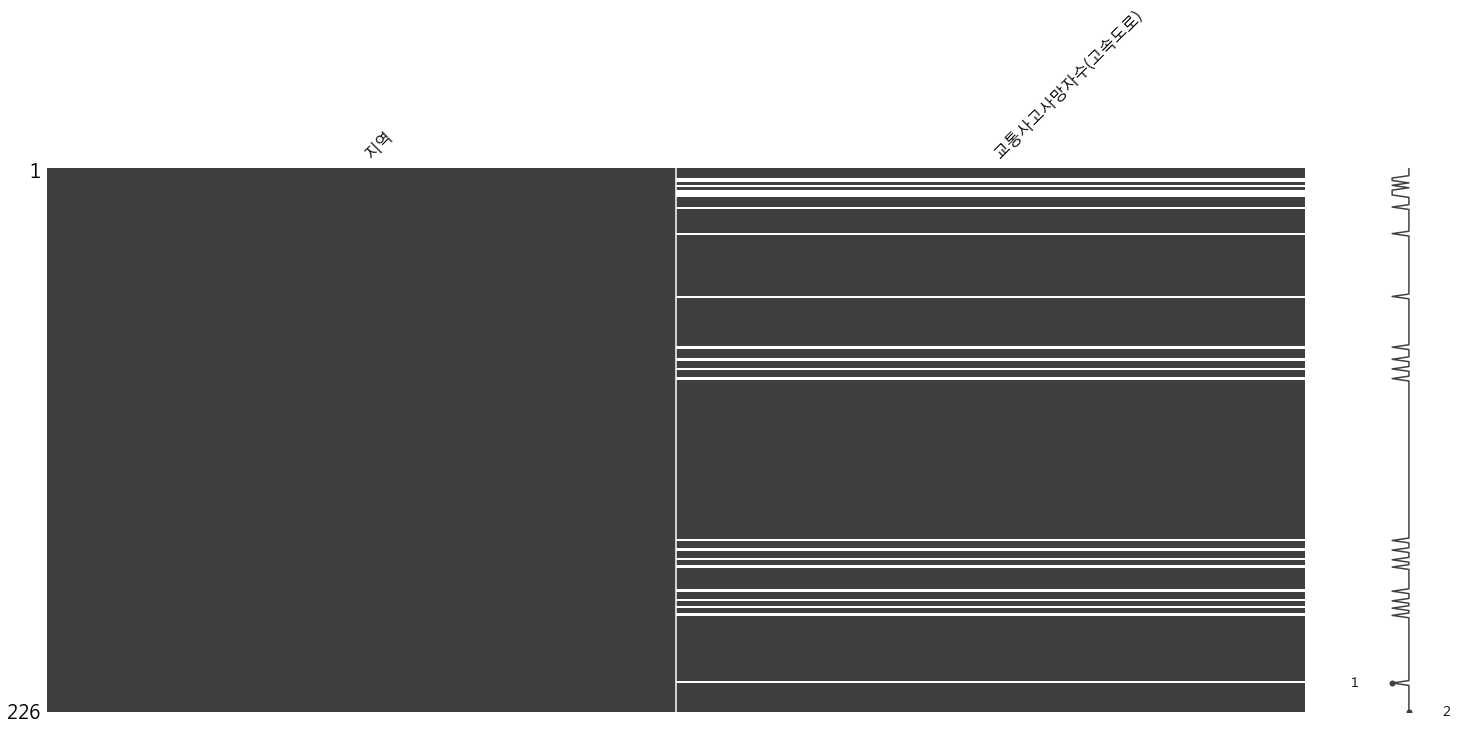

In [49]:
msno.matrix(sigungu_14.loc[:,['지역','교통사고사망자수(고속도로)']])

## 시군구 평균으로 처리하는 아이들
### {강원-삼척,속초} {경북-영덕,청송}  {전남-고흥}  {충남-계룡}

In [50]:
a = sigungu.groupby(['년도','시도']).mean()
a['교통사고사망자수(고속도로)']

년도    시도     
2008  강원도        0.572881
      경기도        0.110634
      경상남도       0.318646
      경상북도       0.289806
      광주광역시      0.053625
      대구광역시      0.082527
      대전광역시      0.095364
      부산광역시      0.056055
      서울특별시      0.007149
      울산광역시      0.068208
      인천광역시      0.034043
      전라남도       0.357820
      전라북도       0.381372
      제주특별자치도         NaN
      충청남도       0.364193
      충청북도       0.519758
2009  강원도        0.196128
      경기도        0.114290
      경상남도       0.505035
      경상북도       0.331558
      광주광역시      0.014060
      대구광역시      0.077343
      대전광역시      0.051026
      부산광역시      0.070355
      서울특별시      0.005193
      울산광역시      0.104337
      인천광역시      0.075874
      전라남도       0.292428
      전라북도       0.307668
      제주특별자치도    0.000000
      충청남도       0.254371
      충청북도       0.462160
2010  강원도        0.296889
      경기도        0.123042
      경상남도       0.304006
      경상북도       0.367404
      광주광역시      0.041210
      대구광역시      0.08535

### {강원-삼척,속초} 

In [51]:
fill_score('교통사고사망자수(고속도로)', 0.281397,'2014_강원도_삼척시','2014_강원도_속초시')

In [52]:
sigungu_14.loc[sigungu_14['교통사고사망자수(고속도로)'].isnull(),['년도','시도','지역','교통사고사망자수(고속도로)']].shape

(21, 4)

### {경북-영덕,청송}

In [53]:
fill_score('교통사고사망자수(고속도로)', 0.249462,'2014_경상북도_영덕군','2014_경상북도_청송군')

In [54]:
sigungu_14.loc[sigungu_14['교통사고사망자수(고속도로)'].isnull(),['년도','시도','지역','교통사고사망자수(고속도로)']].shape

(20, 4)

### {전남-고흥}

In [55]:
fill_score('교통사고사망자수(고속도로)', 0.083117,'2014_전라남도_고흥군')

In [56]:
sigungu_14.loc[sigungu_14['교통사고사망자수(고속도로)'].isnull(),['년도','시도','지역','교통사고사망자수(고속도로)']].shape

(19, 4)

### {{충남-계룡}}

In [57]:
fill_score('교통사고사망자수(고속도로)', 0.128230,'2014_충청남도_계룡시')

In [58]:
sigungu_14.loc[sigungu_14['교통사고사망자수(고속도로)'].isnull(),['년도','시도','지역','교통사고사망자수(고속도로)']].shape

(19, 4)

### 0으로 처리하는 아이들
### 나머지 결측치 전부

In [59]:
 sigungu_14["교통사고사망자수(고속도로)"] = sigungu_14["교통사고사망자수(고속도로)"].fillna(0)

In [60]:
 sigungu_14.loc[sigungu_14['교통사고사망자수(고속도로)'].isnull(),['년도','시도','지역','교통사고사망자수(고속도로)']].shape

(0, 4)

### 잘 채워졌는지 확인하기

In [61]:
sigungu_14.loc[:,["지역","교통사고사망자수(고속도로)"]]

,지역,교통사고사망자수(고속도로)
0,2014_강원도_강릉시,0.276750
1,2014_강원도_고성군,0.000000
2,2014_강원도_동해시,0.000000
3,2014_강원도_삼척시,0.000000
4,2014_강원도_속초시,0.281397
5,2014_강원도_양구군,0.000000
6,2014_강원도_양양군,0.000000
7,2014_강원도_영월군,0.000000
8,2014_강원도_원주시,0.092350
9,2014_강원도_인제군,0.000000


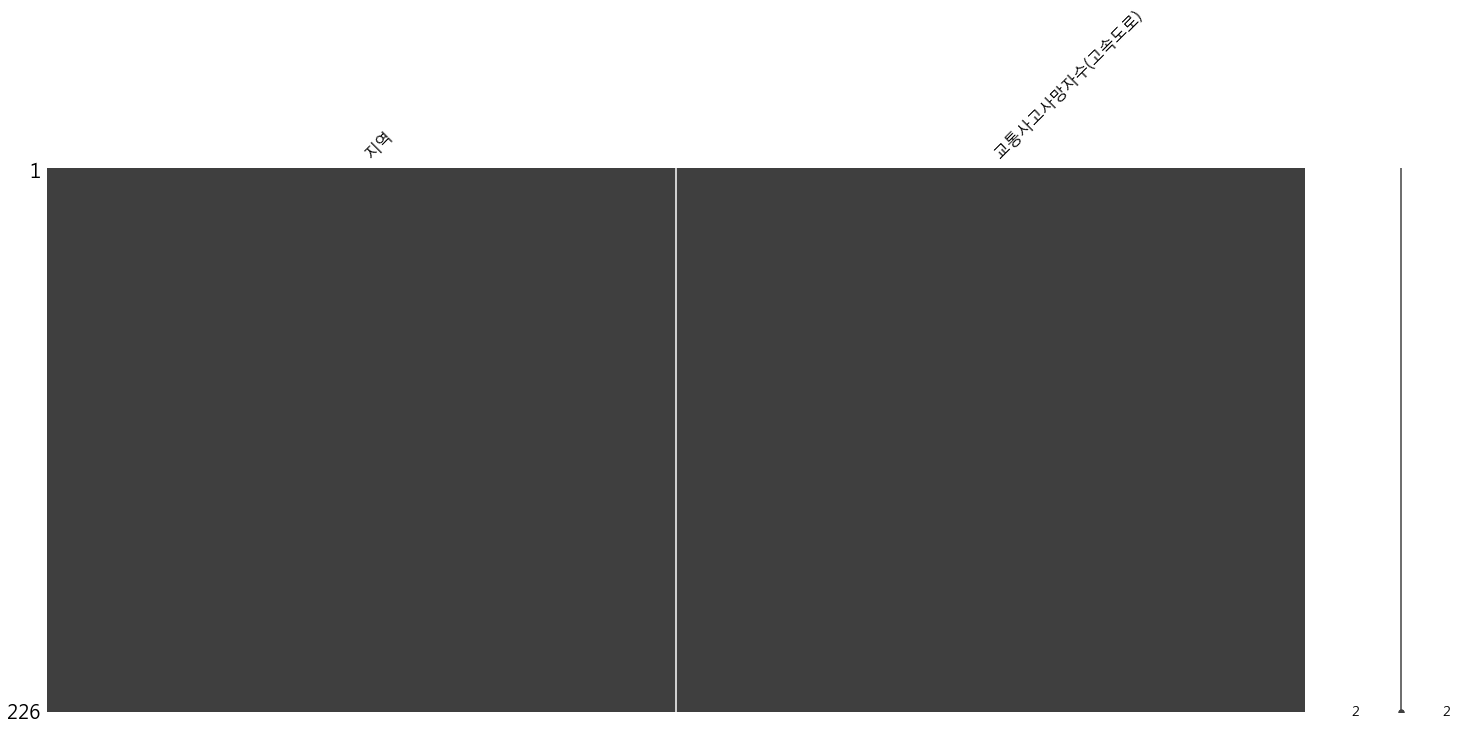

In [62]:
msno.matrix(sigungu_14.loc[:,['지역','교통사고사망자수(고속도로)']])

## 도로면적

In [63]:
#### 당진시 2015값(0.04656)

In [64]:
###값 대체###
fill_score('도로면적',0.04656,'2014_충청남도_당진시')

In [65]:
sigungu_14.loc[sigungu_14['도로면적'].isnull(),['년도','시도','지역','도로면적']].shape

(0, 4)

## 도로면적 비율

In [66]:
#### 당진시 2015값(4.65599)

In [67]:
###값 대체###
fill_score('도로면적 비율',4.65599,'2014_충청남도_당진시')

In [68]:
sigungu_14.loc[sigungu_14['도로면적 비율'].isnull(),['년도','시도','지역','도로면적 비율']].shape

(0, 4)

## 무면허교통사고 발생건수

In [69]:
a = sigungu.groupby(['년도','시도']).mean()
a['무면허교통사고 발생건수']

년도    시도     
2008  강원도         3.128478
      경기도         2.565595
      경상남도        3.037606
      경상북도        4.247315
      광주광역시       2.462018
      대구광역시       2.680276
      대전광역시       1.761812
      부산광역시       2.221513
      서울특별시       1.466962
      울산광역시       2.861468
      인천광역시       1.941161
      전라남도        4.326036
      전라북도        2.493100
      제주특별자치도          NaN
      충청남도        3.456709
      충청북도        3.278587
2009  강원도         2.600818
      경기도         2.207599
      경상남도        3.115616
      경상북도        3.910209
      광주광역시       2.761766
      대구광역시       2.565589
      대전광역시       1.722586
      부산광역시       2.273826
      서울특별시       1.357658
      울산광역시       3.067320
      인천광역시       1.783478
      전라남도        4.552043
      전라북도        2.613856
      제주특별자치도     2.966375
      충청남도        3.359447
      충청북도        2.984546
2010  강원도         2.104978
      경기도         1.911529
      경상남도        3.043846
      경상북도        3.761249
      광주광역시   

In [70]:
#### 2014_전라북도(1.877065)_무주군

In [71]:
fill_score('무면허교통사고 발생건수',1.877065,'2014_전라북도_무주군')

In [72]:
sigungu_14.loc[sigungu_14['무면허교통사고 발생건수'].isnull(),['년도','시도','지역','무면허교통사고 발생건수']].shape

(1, 4)

In [73]:
#### 2014_충청남도(2.340964)_계룡시

In [74]:
fill_score('무면허교통사고 발생건수',2.340964,'2014_충청남도_계룡시')

In [75]:
sigungu_14.loc[sigungu_14['무면허교통사고 발생건수'].isnull(),['년도','시도','지역','무면허교통사고 발생건수']].shape

(0, 4)

## 보행자전용·우선도로 면적

#### 15년도 값으로 넓값인 애들 교체하기

In [76]:
### 널값인 14년도 애들 뽑아내기
dex = sigungu_14.loc[sigungu_14['보행자전용·우선도로 면적'].isnull(),['지역','보행자전용·우선도로 면적']].index.tolist()

In [77]:
# 14년도 널값인 인덱스를 기준으로 15년 값 뽑아내는과정
a = sigungu_15.iloc[dex,:]
df_15 =a['보행자전용·우선도로 면적']
sigungu_14.loc[dex,'보행자전용·우선도로 면적'] = a

In [78]:
sigungu_14.loc[sigungu_14['보행자전용·우선도로 면적'].isnull(),['년도','시도','지역','보행자전용·우선도로 면적']].shape

(0, 4)

In [79]:
sigungu_14.loc[sigungu_14['보행자전용·우선도로 면적'].isnull(),['년도','시도','지역','보행자전용·우선도로 면적']]

,년도,시도,지역,보행자전용·우선도로 면적


## 보행자전용·우선도로 연장

#### 15년도 값으로 넓값인 애들 교체하기

In [80]:
dex = sigungu_14.loc[sigungu_14['보행자전용·우선도로 연장'].isnull(),['지역','보행자전용·우선도로 연장']].index.tolist()

In [81]:
# 14년도 널값인 인덱스를 기준으로 15년 값 뽑아내는과정
a = sigungu_15.iloc[dex,:]
df_15 =a['보행자전용·우선도로 연장']
sigungu_14.loc[dex,'보행자전용·우선도로 연장'] = a

In [82]:
sigungu_14.loc[sigungu_14['보행자전용·우선도로 연장'].isnull(),['년도','시도','지역','보행자전용·우선도로 연장']].shape

(0, 4)

## 상업지역면적

### 2014_인천광역시_옹진군, 통계치 보니 0이라 0으로 대체

In [83]:
###값 대체###
fill_score('상업지역 면적',0,'2014_인천광역시_옹진군')

In [84]:
sigungu_14.loc[sigungu_14['상업지역 면적'].isnull(),['년도','시도','지역','상업지역 면적']].shape

(0, 4)

## 임야 면적

### 대구중구 0으로 대체

In [85]:
###값 대체###
fill_score('임야 면적',0,'2014_대구광역시_중구')

In [86]:
sigungu_14.loc[sigungu_14['임야 면적'].isnull(),['년도','시도','지역','임야 면적']].shape

(1, 4)

### 당진시 12(0.34405),15년도 평균(0.33212)

In [87]:
(0.34405+0.33212)/2

0.338085

In [88]:
###값 대체###
fill_score('임야 면적',0.338085,'2014_충청남도_당진시')

In [89]:
sigungu_14.loc[sigungu_14['임야 면적'].isnull(),['년도','시도','지역','임야 면적']].shape

(0, 4)

## 주거지역 면적

### 옹진군 0으로 대체

In [90]:
###값 대체###
fill_score('주거지역 면적',0,'2014_인천광역시_옹진군')

In [91]:
sigungu_14.loc[sigungu_14['주거지역 면적'].isnull(),['년도','시도','지역','주거지역 면적']].shape

(0, 4)

## 하천연장

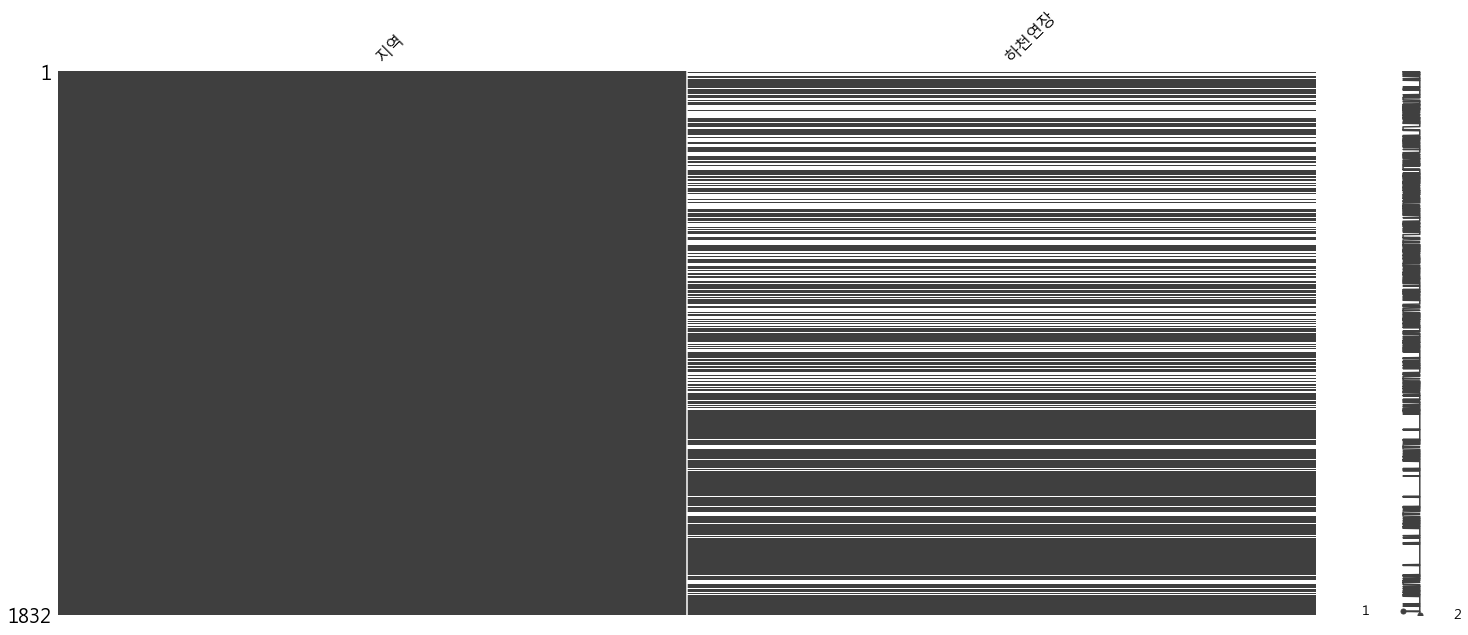

In [92]:
msno.matrix(sigungu.loc[:,['지역','하천연장']])

### 과거 측정치가 있으면 최신 걸로 대체
#### 하천연장은 하천길이, 매해 크게 변하지 않는 것이므로

#### 부산광역시 금정구

In [93]:
### 2009_부산광역시_금정구 0.13505

In [94]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_금정구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_금정구','하천연장'].fillna(0.13505)

In [95]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(33, 4)

#### 부산광역시 남구 

In [96]:
### 2009_부산광역시_남구 0.00850

In [97]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_남구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_남구','하천연장'].fillna(0.00850)

In [98]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(32, 4)

#### 부산광역시 동구

In [99]:
### 2009_부산광역시_동구 0.10327

In [100]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_동구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_동구','하천연장'].fillna(0.10327)

In [101]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(31, 4)

#### 부산광역시 부산진구

In [102]:
### 2009_부산광역시_부산진구 0.02331

In [103]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_부산진구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_부산진구','하천연장'].fillna(0.02331)

In [104]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(30, 4)

#### 부산광역시 사하구

In [105]:
### 2009_부산광역시_사하구 0.01612

In [106]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_사하구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_사하구','하천연장'].fillna(0.01612)

In [107]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(29, 4)

#### 부산광역시 서구

In [108]:
### 2009_부산광역시_서구 0.04408

In [109]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_서구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_서구','하천연장'].fillna(0.04408)

In [110]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(28, 4)

#### 부산광역시 연제구

In [111]:
### 2009_부산광역시_연제구 0.28146

In [112]:
sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_연제구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_부산광역시_연제구','하천연장'].fillna(0.28146)

In [113]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(27, 4)

#### 경상남도 산청군

In [114]:
### 2009_경상남도_산청군 0.00561

In [115]:
sigungu_14.loc[sigungu_14["지역"]=='2014_경상남도_산청군','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_경상남도_산청군','하천연장'].fillna(0.00561)

In [116]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(26, 4)

#### 광주광역시 광산구

In [117]:
### 2012_광주광역시_광산구 0.20248

In [118]:
sigungu_14.loc[sigungu_14["지역"]=='2014_광주광역시_광산구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_광주광역시_광산구','하천연장'].fillna(0.20248)

In [119]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(25, 4)

#### 광주광역시 동구

In [120]:
### 2012_광주광역시_동구 0.03659

In [121]:
sigungu_14.loc[sigungu_14["지역"]=='2014_광주광역시_동구','하천연장']=sigungu_14.loc[sigungu_14["지역"]=='2014_광주광역시_동구','하천연장'].fillna(0.03659)

In [122]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(24, 4)

### 과거데이터 없어서, 주변 하천 연결된 시군구들의 평균값

#### 경상남도_의령군(창녕,함안,진주시)

In [123]:
##평균내기###
mean_score('하천연장',
           '2014_경상남도_창녕군','2014_경상남도_함안군',
          '2014_경상남도_진주시')

array([0.02572])

In [124]:
###값 대체###
fill_score('하천연장',0.02572,'2014_경상남도_의령군')

In [125]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(23, 4)

#### 대구광역시_중구(서구, 북구, 동구)

In [126]:
###평균내기###
mean_score('하천연장','2014_대구광역시_서구',
           '2014_대구광역시_북구','2014_대구광역시_동구')


array([0.17901333])

In [127]:
###값 대체###
fill_score('하천연장', 0.17901333,'2014_대구광역시_중구')

In [128]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(22, 4)

#### 대구광역시_남구(서구,달서구, 수성구)

In [129]:
###평균내기###
mean_score('하천연장','2014_대구광역시_서구',
           '2014_대구광역시_수성구','2014_대구광역시_달서구')

array([0.12642667])

In [130]:
###값 대체###
fill_score('하천연장', 0.12642667,'2014_대구광역시_남구')

In [131]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(21, 4)

#### 부산광역시_기장군(해운대구, 금정구)

In [132]:
###평균내기###
mean_score('하천연장','2014_부산광역시_해운대구',
           '2014_부산광역시_금정구')

array([0.068925])

In [133]:
###값 대체###
fill_score('하천연장', 0.068925,'2014_부산광역시_기장군')

In [134]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(20, 4)

#### 부산광역시_수영구(연제구, 해운대구, 남구)

In [135]:
###평균내기###
mean_score('하천연장','2014_부산광역시_연제구','2014_부산광역시_해운대구',
          '2014_부산광역시_남구')

array([0.09758667])

In [136]:
###값 대체###
fill_score('하천연장', 0.09758667,'2014_부산광역시_수영구')

In [137]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(19, 4)

#### 부산광역시_강서구(김해, 북구)

In [138]:
###평균내기###
mean_score('하천연장','2014_경상남도_김해시','2014_부산광역시_북구')

array([0.10976])

In [139]:
###값 대체###
fill_score('하천연장',0.10976,'2014_부산광역시_강서구')

In [140]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(18, 4)

#### 부산광역시_동래구(북구, 연제구, 수영구, 해운대구)

In [141]:
###평균내기###
mean_score('하천연장','2014_부산광역시_북구','2014_부산광역시_해운대구',
          '2014_부산광역시_연제구','2014_부산광역시_수영구')

array([0.11895667])

In [142]:
###값 대체###
fill_score('하천연장', 0.11895667,'2014_부산광역시_동래구')

In [143]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(17, 4)

#### 부산광역시_사상구(북구, 서구, 강서구)

In [144]:
###평균내기###
mean_score('하천연장','2014_부산광역시_북구','2014_부산광역시_서구',
          '2014_부산광역시_강서구')

array([0.08260667])

In [145]:
###값 대체###
fill_score('하천연장', 0.08260667,'2014_부산광역시_사상구')

In [146]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(16, 4)

#### 부산광역시_수영구(연제구, 해운대구, 남구)

In [147]:
###평균내기###
mean_score('하천연장','2014_부산광역시_연제구','2014_부산광역시_해운대구',
          '2014_부산광역시_남구')

array([0.09758667])

In [148]:
###값 대체###
fill_score('하천연장', 0.09758667,'2014_부산광역시_수영구')

In [149]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(16, 4)

#### 부산광역시_중구(서구,남구,사하구)

In [150]:
###평균내기###
mean_score('하천연장','2014_부산광역시_동구','2014_부산광역시_서구',
          '2014_부산광역시_사하구')

array([0.05449])

In [151]:
###값 대체###
fill_score('하천연장', 0.02486333,'2014_부산광역시_중구')

In [152]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(15, 4)

#### 부산광역시_영도구(서구,남구,동구,중구)

In [153]:
###평균내기###
mean_score('하천연장','2014_부산광역시_서구','2014_부산광역시_남구',
          '2014_부산광역시_동구','2014_부산광역시_중구')

array([0.04517833])

In [154]:
###값 대체###
fill_score('하천연장', 0.02295833,'2014_부산광역시_영도구')

In [155]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(14, 4)

#### 서울특별시_광진구(송파구,강동구,성동구,감남구,구리시)

In [156]:
###평균내기###
mean_score('하천연장','2014_서울특별시_송파구','2014_서울특별시_강동구',
          '2014_서울특별시_성동구','2014_서울특별시_강남구','2014_경기도_구리시')   

array([0.674708])

In [157]:
###값 대체###
fill_score('하천연장', 0.674708,'2014_서울특별시_광진구')

In [158]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(13, 4)

#### 서울특별시_마포구(강서구,영등포구,용산구,동작구)

In [159]:
###평균내기###
mean_score('하천연장','2014_서울특별시_강서구','2014_서울특별시_영등포구',
          '2014_서울특별시_용산구','2014_서울특별시_동작구')   

array([0.1027975])

In [160]:
###값 대체###
fill_score('하천연장', 0.1027975,'2014_서울특별시_마포구')

In [161]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(12, 4)

#### 서울특별시_양천구(구로구, 경기도_부천시,금천구)

In [162]:
###평균내기###
mean_score('하천연장','2014_서울특별시_구로구','2014_경기도_부천시',
          '2014_서울특별시_금천구')   

array([0.36606667])

In [163]:
###값 대체###
fill_score('하천연장', 0.36606667,'2014_서울특별시_양천구')

In [164]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(11, 4)

#### 서울특별시_중구(용산구,서대문구)

In [165]:
###평균내기###
mean_score('하천연장','2014_서울특별시_용산구','2014_서울특별시_서대문구')   

array([0.081935])

In [166]:
###값 대체###
fill_score('하천연장', 0.081935,'2014_서울특별시_중구')

In [167]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(10, 4)

#### 울산광역시_남구(울산 중구, 북구)

In [168]:
###평균내기###
mean_score('하천연장','2014_울산광역시_중구','2014_울산광역시_북구')   

array([0.112975])

In [169]:
###값 대체###
fill_score('하천연장', 0.112975,'2014_울산광역시_남구')

In [170]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(9, 4)

#### 울산광역시_동구 (울산 중구, 북구)

In [171]:
###평균내기###
mean_score('하천연장','2014_울산광역시_중구','2014_울산광역시_북구')  

array([0.112975])

In [172]:
###값 대체###
fill_score('하천연장', 0.112975,'2014_울산광역시_동구')

In [173]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(8, 4)

### 인천광역시_중구

In [174]:
#### 2015년 값으로 채우기(0.01246)

In [175]:
fill_score('하천연장', 0.01246,'2014_인천광역시_중구')

In [176]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(7, 4)

#### 인천광역시_남구( 남동구, 연수구) 

In [177]:
###평균내기###
mean_score('하천연장','2014_인천광역시_남동구'
          ,'2014_인천광역시_연수구')  

array([0.033515])

In [178]:
###값 대체###
fill_score('하천연장', 0.033515,'2014_인천광역시_남구')

In [179]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(6, 4)

#### 인천광역시_동구(인천 남구,중구)

In [180]:
###평균내기###
mean_score('하천연장','2014_인천광역시_남구'
          ,'2014_인천광역시_중구') 

array([0.0229875])

In [181]:
###값 대체###
fill_score('하천연장', 0.0229875,'2014_인천광역시_동구')

In [182]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(5, 4)

#### 인천광역시_부평구( 남동구, 부천시)

In [183]:
###평균내기###
mean_score('하천연장','2014_경기도_부천시'
          ,'2014_인천광역시_남동구') 

array([0.12832])

In [184]:
###값 대체###
fill_score('하천연장', 0.12832,'2014_인천광역시_부평구')

In [185]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(4, 4)

#### 인천광역시_옹진군(인천 중구)

In [186]:
###평균내기###
mean_score('하천연장','2014_인천광역시_중구')

array([0.01246])

In [187]:
###값 대체###
fill_score('하천연장',0.01246,'2014_인천광역시_옹진군')

In [188]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(3, 4)

#### 전라북도_김제시(부안군,정읍시, 익산시)

In [189]:
###평균내기###
mean_score('하천연장','2014_전라북도_부안군','2014_전라북도_정읍시','2014_전라북도_익산시')

array([0.30568333])

In [190]:
###값 대체###
fill_score('하천연장',0.30568333,'2014_전라북도_김제시')

In [191]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(2, 4)

#### 전라북도_임실군(남원시, 장수군,진안군,정읍시,순창군)
##### 순창군에 연결되어 있는 하천 많아서 추가함

In [192]:
###평균내기###
mean_score('하천연장','2014_전라북도_남원시','2014_전라북도_장수군','2014_전라북도_진안군',
          '2014_전라북도_정읍시','2014_전라북도_순창군')

array([0.26955])

In [193]:
###값 대체###
fill_score('하천연장',0.26955,'2014_전라북도_임실군')

In [194]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(1, 4)

#### 충청남도_태안군(충청남도 서산시)

In [195]:
###평균내기###
mean_score('하천연장','2014_충청남도_서산시' )

array([0.01804])

In [196]:
###값 대체###
fill_score('하천연장',0.01804,'2014_충청남도_태안군')

In [197]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']].shape

(0, 4)

### 최종확인

In [198]:
sigungu_14.loc[sigungu_14['하천연장'].isnull(),['년도','시도','지역','하천연장']]

,년도,시도,지역,하천연장


In [199]:
sigungu_14.loc[sigungu_14['하천연장'].notnull(),['년도','시도','지역','하천연장']]

,년도,시도,지역,하천연장
0,2014,강원도,2014_강원도_강릉시,0.022350
1,2014,강원도,2014_강원도_고성군,0.134520
2,2014,강원도,2014_강원도_동해시,0.087590
3,2014,강원도,2014_강원도_삼척시,0.004210
4,2014,강원도,2014_강원도_속초시,0.043360
5,2014,강원도,2014_강원도_양구군,0.199610
6,2014,강원도,2014_강원도_양양군,0.231860
7,2014,강원도,2014_강원도_영월군,0.122470
8,2014,강원도,2014_강원도_원주시,0.106900
9,2014,강원도,2014_강원도_인제군,0.299270


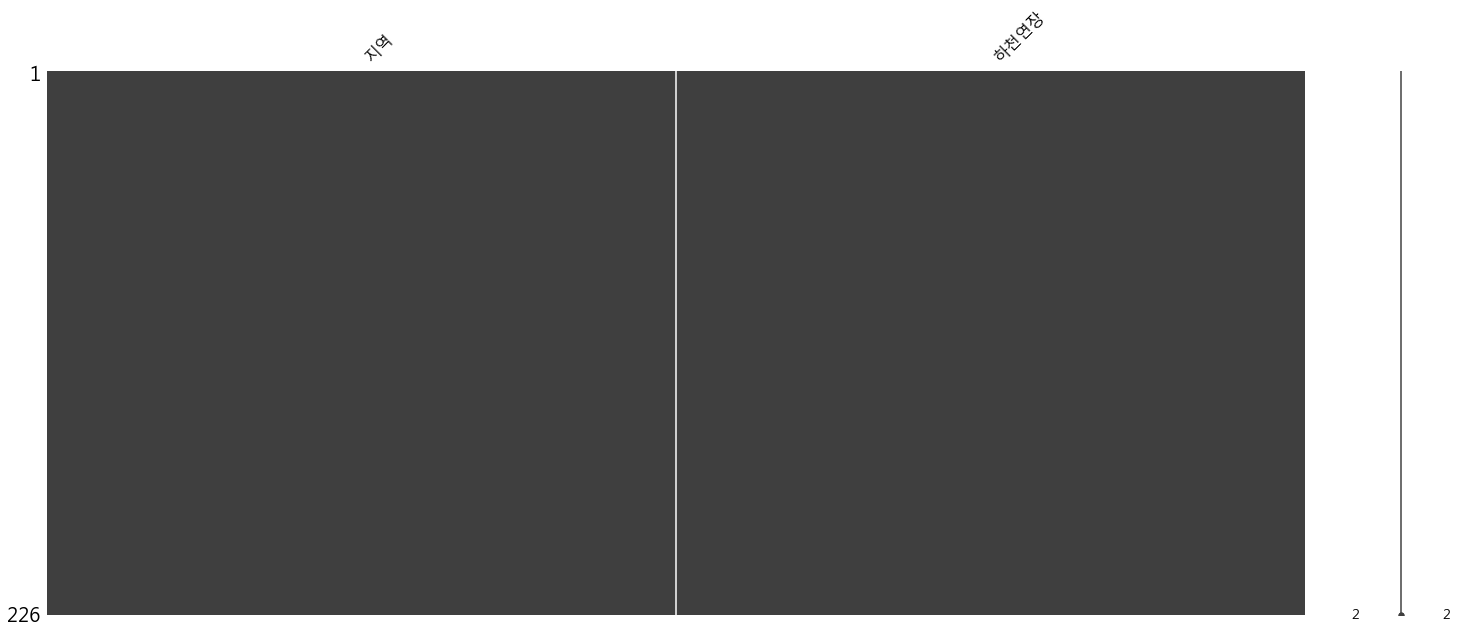

In [200]:
msno.matrix(sigungu_14.loc[:,['지역','하천연장']])

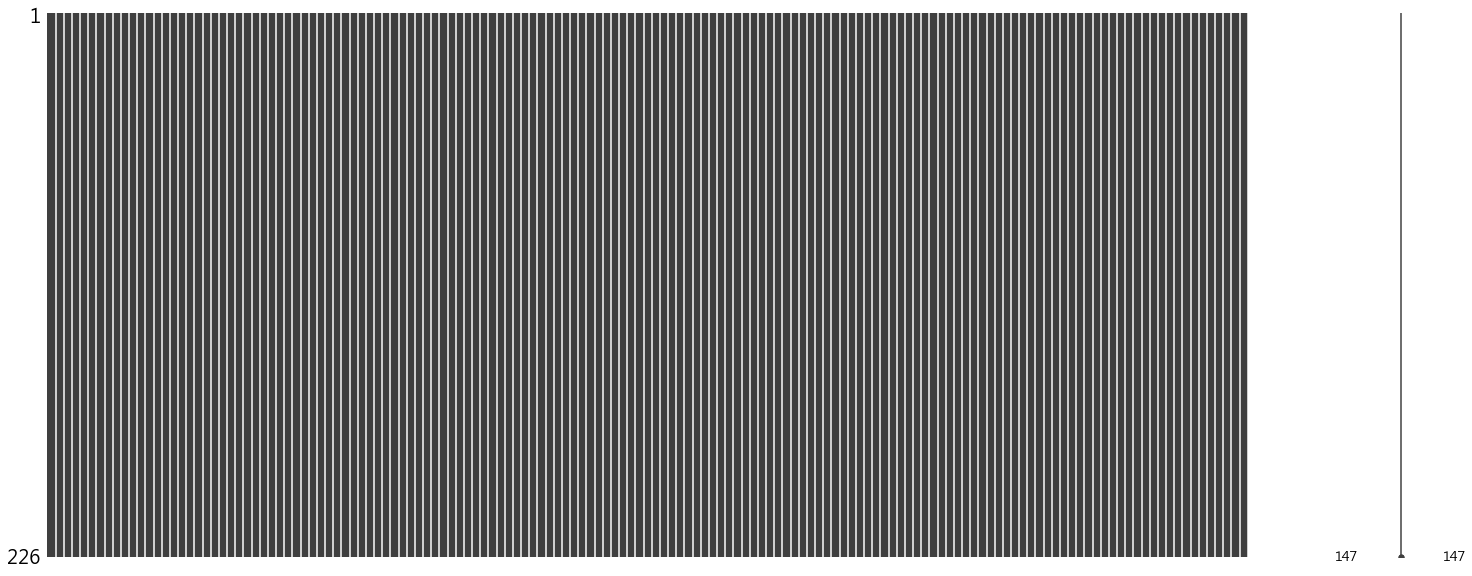

In [201]:
msno.matrix(sigungu_14)

In [202]:
si = sigungu_14.iloc[:,:-7]

In [203]:
info_df(si)

,년도,시도,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액
type,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 전처리 완료된 데이터 저장

In [204]:
si.to_csv(path+'imp_시군구별지역안전지표_2014.csv',encoding='cp949',index=False)